# Oscilador Armónico Simple
* Prof. Esteban Pérez Hidalgo
* Física Computacional I I-2024

## 1. Oscilador armónico simple

<div>
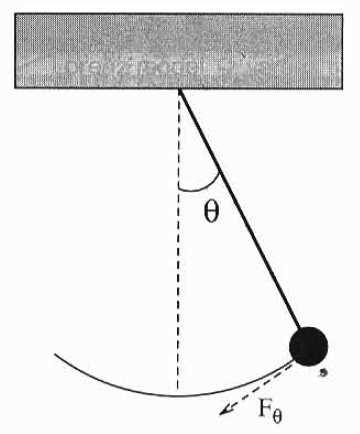
</div>

La fuerza restauradora en un péndulo simple se puede expresar como
$$
F_{\theta} = -mg\sin(\theta)
$$

Se usa la aproximación para ángulos pequeños $\sin(\theta) \approx \theta$. De manera que la ecuación de movimiento se expresa como:

\begin{equation}
    \ddot \theta + \frac{g}{l}\theta = 0
    \label{OAS}
\end{equation}

Cuya solución analítica tiene la forma:
$$
\theta = \theta_0 \sin(\Omega t + \phi)
\label{eq:oas}
$$

donde $\Omega = \sqrt{g/l}$, $\theta_0$ es la amplitud y $\phi$ la fase.

Ahora se considera un enfoque numérico al problema. Para resolver la ecuación diferencial de segundo orden se transforma en un sistema de dos ecuaciones de primer orden:

\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta\\
    \dot \theta &= \omega
\end{cases}
\end{align}

### Diagrama de fase

<div>
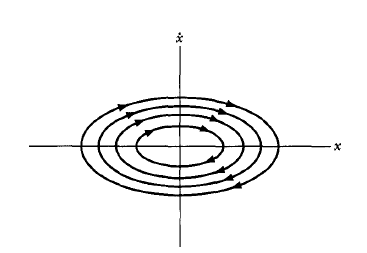
</div>


* Representa el espacio de todos los posibles estados del sistema
* Gráfico de $\theta$ contra $\omega$. 
* Desde el punto de vista dinámico, las variables $\theta$ y $\omega$ determinan el estado del sistema. Por lo tanto, se pude considerar que $\theta$ y $\omega$ representan las coordenadas de un punto en un _espacio de fase_. 
* La evolución temporal del sistema se representa en este gráfico como una trayectoria. 
* Cada set de condiciones iniciales determinan una trayectoria distinta.
* Al conjunto de todas las posibles trayectorias del sistema se le conoce como el _diagrama de fase_ del oscilador armónico.

### Uso de `scipy.integrate.solve_ivp()`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

solve_ivp?

Signature:
solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite your pro

### Ejemplo: Movimiento de un proyectil

Ecuaciones de movimiento:

\begin{align}
\begin{cases}
    \dot x &= v_x\\
    \dot v_x &= 0 \\
    \dot y &= v_y\\
    \dot v_y &= 0\\
    \dot z &= v_z\\
    \dot v_z &= -g
\end{cases}
\end{align}

In [2]:
def Proyectil_Ideal(t, estado, g):
    """
    Función que calcula la dinámica del movimiento del projectil en tres dimensiones
    El modelo no toma en cuenta resistencia ni fuerza externa
    """
    x, vx, y, vy, z, vz = estado
    
    dx = vx
    dvx = 0.
    dy = vy
    dvy = 0.
    dz = vz
    dvz = -g
    
    return [dx, dvx, dy, dvy, dz, dvz]

# Parámetros del modelo
g = 9.81
p = (g,)

# Condiciones iniciales del sistema
xi = 0
vxi = 50
yi = 0
vyi = 50
zi = 0
vzi = 400

cond_iniciales = [xi, vxi, yi, vyi, zi, vzi]

# Intervalo temporal
t_span = (0.0, 85.0)
t_eval = np.arange(0, 85, 2)

# Uso de solve_ivp()
result_solve_ivp = solve_ivp(Proyectil_Ideal, t_span, y0=cond_iniciales, t_eval=t_eval, args=p)

% print(result_solve_ivp.y)

UsageError: Line magic function `%` not found.


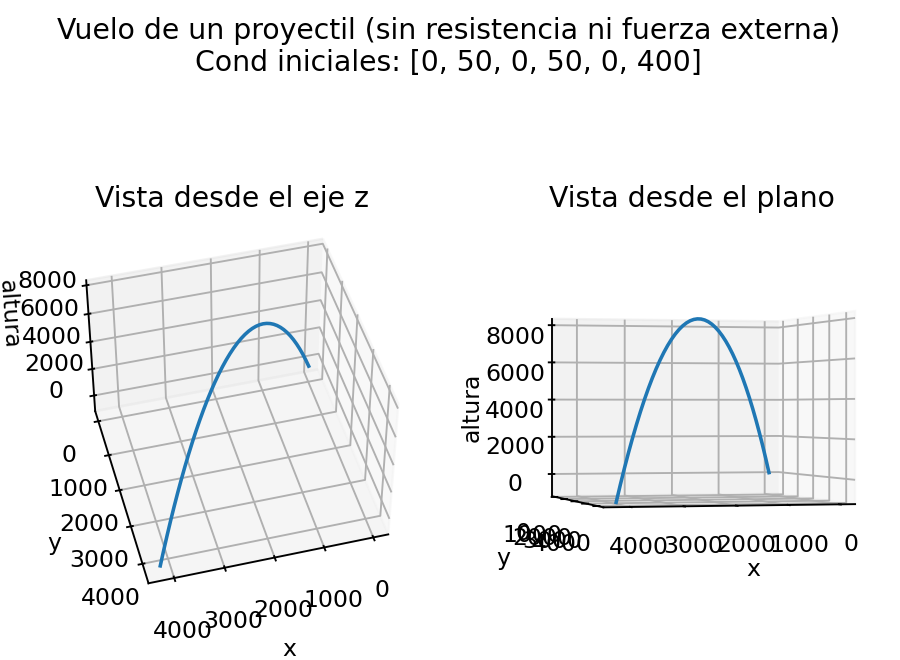

In [4]:
fig, (ax, ax1) = plt.subplots(1, 2, dpi=170, subplot_kw=dict(projection='3d'))

ax.view_init(45, 75)
ax.plot(result_solve_ivp.y[0, :], result_solve_ivp.y[2, :], result_solve_ivp.y[4, :])
ax.set_title('Vista desde el eje z')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('altura')

ax1.view_init(0, 75)
ax1.plot(result_solve_ivp.y[0, :], result_solve_ivp.y[2, :], result_solve_ivp.y[4, :])
ax1.set_title('Vista desde el plano')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('altura')

plt.suptitle('Vuelo de un proyectil (sin resistencia ni fuerza externa)\nCond iniciales: {}' \
             .format(cond_iniciales))
plt.show()

## Gráficas resultantes del OAS

### Solución analítica vs solución numérica

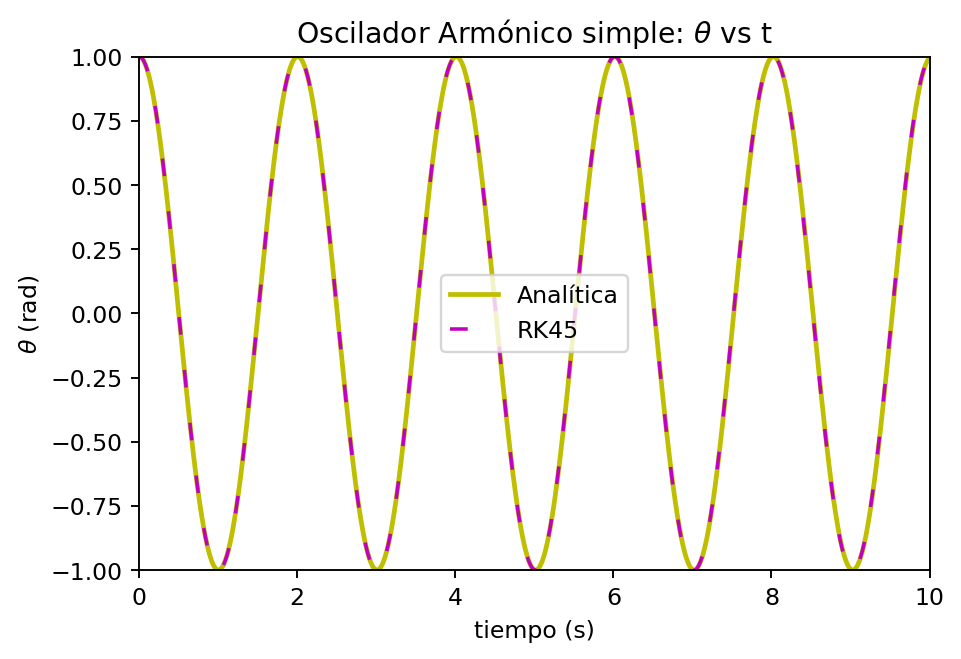

### Diagrama de fase

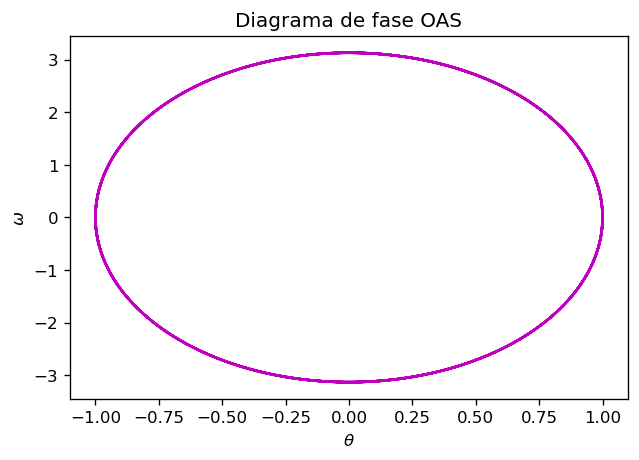

## 2. Oscilador armónico amortiguado

Para caso del oscilador amortiguado se va a tomar en cuenta que la fricción es proporcional a la rapidez del oscilador.

$$
F_{fricción} = -q \dot \theta
$$

Por lo tanto, la ecuación de movimiento se expresa como:
$$
\ddot \theta = -\frac{g}{l}\theta - q \dot \theta
$$

Esta ecuación se expresa como el siguiente sistema de ecuaciones:
\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta -q\omega\\
    \dot \theta &= \omega
\end{cases}
\end{align}

## Referencias

* Giordano, N.; Nakanishi, H. (2006). _Computational Physics, 2ª ed_. Estados Unidos: Pearson Education
* Thornton, S.; Marion, J. (2004). _Classical Dynamics of Particles and Systems, 5th ed_. Estados Unidos.